In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS
from dbclass import dbclass_utils as db_utils

In [3]:
# Defining the mean and sigma arrays:
mean_array = np.array([[10, 10],
                        [5, 20],
                        [10, 30],
                        [50, 50],
                        [30, 20],
                        [50, 10]])
sigma_array = np.array([[2, 1],
                        [2, 3],
                        [6, 3],
                        [8, 4],
                        [8, 8],
                        [6, 7]])


In [4]:
# import some data to play with
ds = dtset.create_dataset(mean_array, sigma_array, n_samples=10000)
# Splitting the data for trainning and for test:
ds_train, ds_validation = dtset.split_data(ds, prop_train=0.5)
ds_validation, ds_test = dtset.split_data(ds_validation, prop_train=0.5)

In [5]:
#    # Trainning the model using cross validation in the trainning dataset:
#    dbclass = DBclass.PGC()
#    prob_thold_list = list(np.arange(0, 1, 0.01)) + [0.999]
#    best_prob_thold, class_metrics = db_utils.cross_validation_trainning(dbclass, ds_train, ds_validation, prob_thold_list)
#    print("\nBest probability threshold value:", best_prob_thold)
#    for metric in class_metrics.keys():
#        print(metric, class_metrics[metric])

In [6]:
# Once the best probability score threshold is found, the classifier is
# configured with the best settings:
dbclass = DBCLASS(prob_thold=0.5)
ds_model = dtset.join_data((ds_train, ds_validation))
dbclass.fit(ds_model['data'], ds_model['target'])

              precision    recall  f1-score   support

     Class 1       0.98      0.82      0.90       417
     Class 2       0.92      0.80      0.85       417
     Class 3       0.85      0.84      0.85       417
     Class 4       0.75      0.87      0.81       417
     Class 5       0.65      0.86      0.74       417
     Class 6       0.75      0.84      0.79       417
     Unknown       0.72      0.65      0.68      1251

    accuracy                           0.77      3753
   macro avg       0.80      0.81      0.80      3753
weighted avg       0.78      0.77      0.77      3753


Confusion matrix:
[[ 9.17  0.05  0.    0.    0.    0.    1.89]
 [ 0.    8.85  0.61  0.    0.03  0.    1.63]
 [ 0.    0.11  9.38  0.    0.37  0.    1.25]
 [ 0.    0.    0.    9.67  0.    0.    1.44]
 [ 0.    0.    0.13  0.03  9.54  0.27  1.15]
 [ 0.    0.    0.    0.    0.75  9.33  1.04]
 [ 0.16  0.61  0.96  3.12  4.08  2.88 21.53]]

Index and Target label:
Index: 0 Label: Class 1
Index: 1 Label: Cla

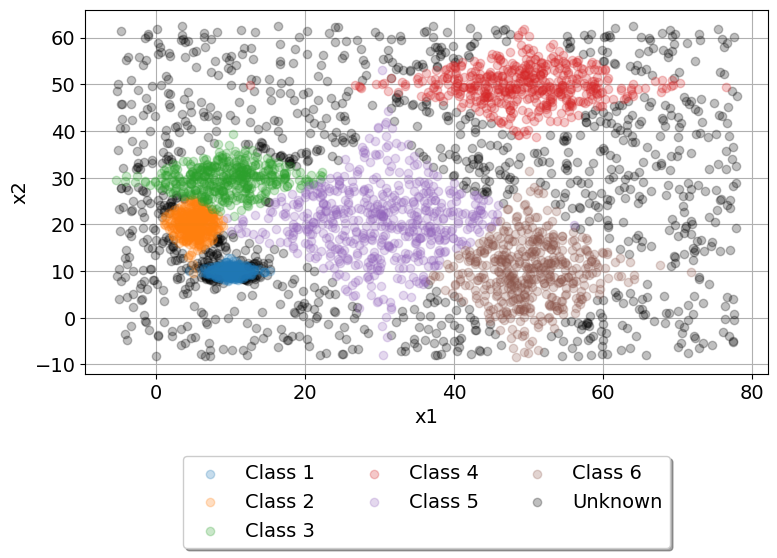

In [7]:
# Testing the model:
ds_test = dtset.insert_rand_noclass(ds_test)
db_utils.dbclass_model_test(dbclass, ds_test)